# Importando librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import tensorflow as tf
from tensorflow import keras
import seaborn as sb

# Importando el dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
filepath = '/content/drive/MyDrive/creditcard.csv'
dataset = pd.read_csv(filepath)
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Generar el conjunto de prueba

In [4]:
y = dataset["Class"]
X = dataset.drop("Class", axis=1)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
200816,133591.0,1.995333,0.207543,-1.951848,1.077145,0.743577,-0.908699,0.704504,-0.325864,-0.325781,...,-0.251115,0.166689,0.494348,-0.075658,-0.406552,0.448392,-0.479410,-0.040529,-0.074213,28.56
41157,40562.0,-1.704433,-0.712634,1.488805,0.251579,1.715358,-0.920773,-0.533004,0.441427,-0.064431,...,0.258945,0.045743,-0.194858,-0.038342,-0.078912,0.575803,0.350500,-0.094393,0.010076,12.31
121131,76083.0,-1.034759,0.512128,-0.827413,1.093431,2.421236,-2.984704,0.576701,-0.227233,-0.582579,...,0.161617,0.098506,-0.052331,0.173158,0.351608,-0.661683,-0.659265,0.208827,0.340938,1.00
160574,113469.0,1.977569,-1.266205,-0.649009,-0.914577,-1.014584,-0.117451,-1.035486,0.058460,-0.149023,...,0.166164,0.418268,1.046292,0.095034,0.805221,-0.194471,-0.152012,-0.012784,-0.037054,89.99
186706,127221.0,-0.849914,-0.906915,0.856435,-1.532486,0.978232,0.323697,-0.291266,0.280204,-0.982864,...,-0.071442,-0.400223,-1.041237,0.324342,-0.388784,-0.535403,-0.714451,0.152506,0.198650,78.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141718,84471.0,1.302827,-0.381417,0.311201,-1.110938,-0.275632,0.463840,-0.630678,0.153520,1.802943,...,-0.065301,-0.068366,0.130724,-0.187998,-1.284290,0.638950,-0.572505,0.113075,0.019255,1.00
208232,137030.0,-0.492144,-0.067665,0.490772,-0.780750,-0.004039,1.777260,0.818601,0.465264,0.408462,...,-0.330335,-0.053012,0.004436,0.486938,-1.493962,-0.870523,-0.636553,0.116457,-0.033364,200.58
225830,144415.0,2.042317,-0.143495,-2.954711,-0.579241,2.610433,3.142249,-0.418329,0.784676,0.360031,...,-0.122934,-0.352994,-0.996361,0.364446,0.604771,-0.264159,0.219787,-0.039003,-0.042977,0.89
46534,42825.0,-2.851817,0.535098,0.362210,0.672763,-0.976181,-1.126596,-0.267550,1.094874,-0.520397,...,-0.280920,-0.041870,-0.217367,0.312636,0.773673,0.079217,0.204351,-0.127037,-0.400604,6.28


In [6]:
y_train

200816    0
41157     0
121131    0
160574    0
186706    0
         ..
141718    0
208232    0
225830    0
46534     0
74032     0
Name: Class, Length: 227845, dtype: int64

# Explorar los datos para obtener ideas

In [7]:
# Información generales de los datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
# Información estadística de los datos
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
# N° de filas y N° de columnas
dataset.shape

(284807, 31)

In [10]:
# Un atributo importante a tomar en cuenta es el monto de la transacción con la tarjeta de crédito.
# Normalmente habrá más probabilidades de fraudes cuando el monto sea muy elevado.

dataset["Amount"].value_counts()

1.00       13688
1.98        6044
0.89        4872
9.99        4747
15.00       3280
           ...  
62.09          1
552.05         1
1467.75        1
196.68         1
95.63          1
Name: Amount, Length: 32767, dtype: int64

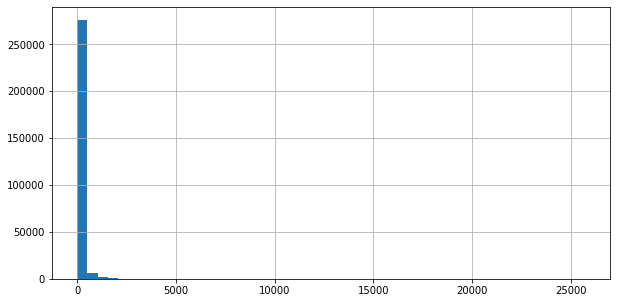

In [11]:
dataset["Amount"].hist(bins=50, figsize=(10,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc697ab65d0>,
      dtype=object)

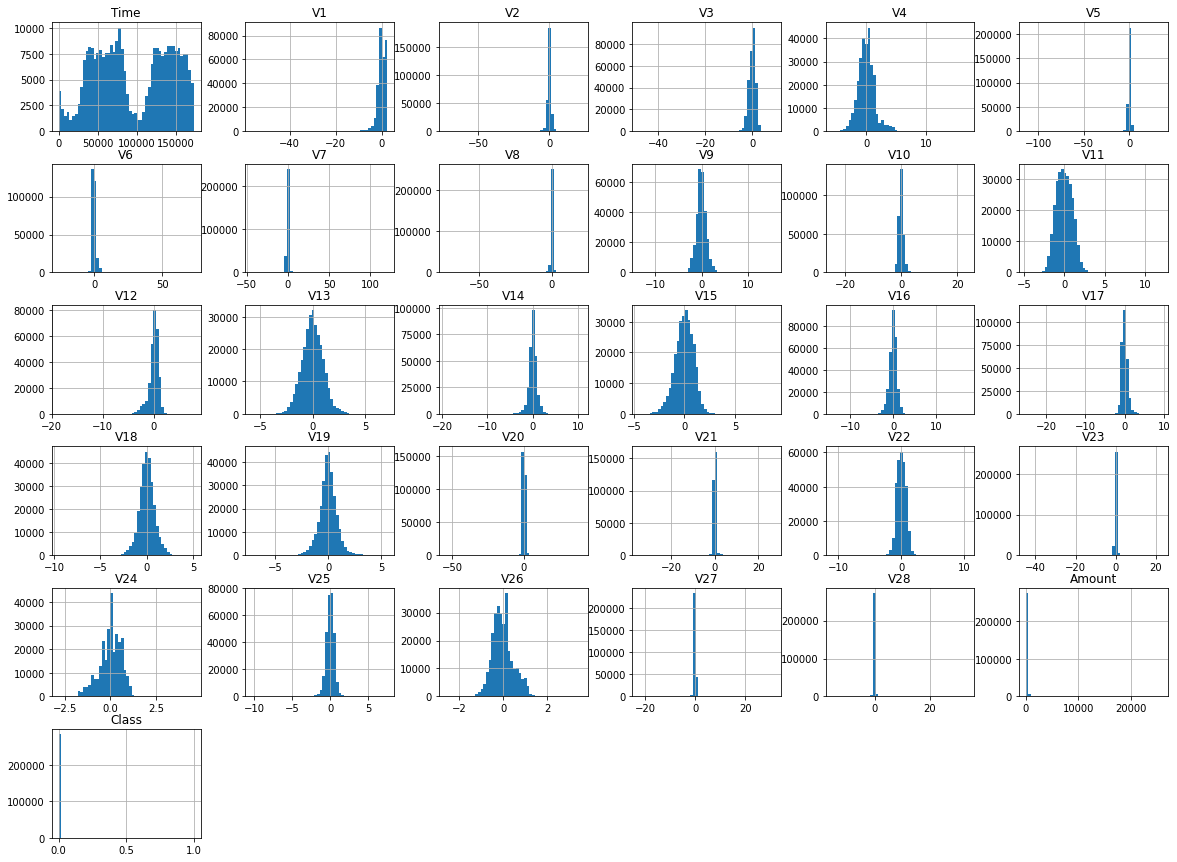

In [12]:
# Igualmente se gráfican todas los atributos que sean de tipo númerico

dataset.hist(bins=50, figsize=(20,15))

### Correlación de los datos (Matriz de Correlación)

In [13]:
corr_matrix = dataset.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class     1.000000
V11       0.154876
V4        0.133447
V2        0.091289
V21       0.040413
V19       0.034783
V20       0.020090
V8        0.019875
V27       0.017580
V28       0.009536
Amount    0.005632
V26       0.004455
V25       0.003308
V22       0.000805
V23      -0.002685
V15      -0.004223
V13      -0.004570
V24      -0.007221
Time     -0.012323
V6       -0.043643
V5       -0.094974
V9       -0.097733
V1       -0.101347
V18      -0.111485
V7       -0.187257
V3       -0.192961
V16      -0.196539
V10      -0.216883
V12      -0.260593
V14      -0.302544
V17      -0.326481
Name: Class, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc696dcd650>,
      dtype=object)

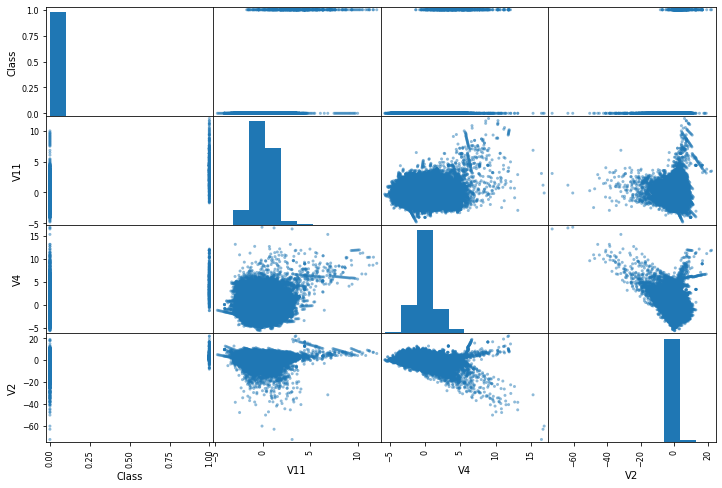

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["Class", "V11", "V4", "V2"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

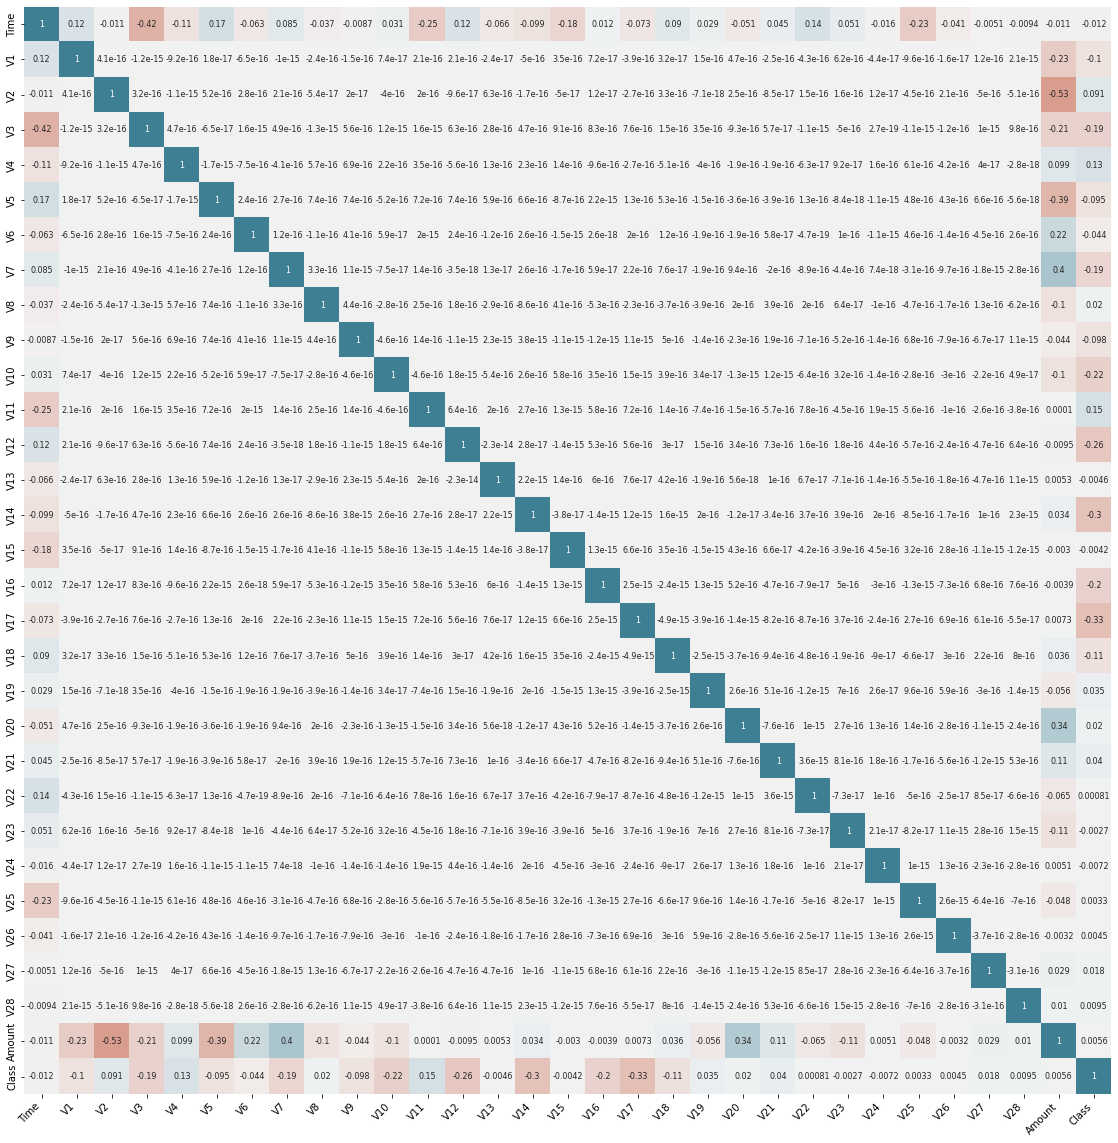

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30, 20))

sb.heatmap(
    corr_matrix,
    annot = True,
    cbar = False,
    annot_kws = {"size": 8},
    vmin = -1,
    vmax = 1,
    center = 0,
    cmap = sb.diverging_palette(20, 220, n=200),
    square = True,
    ax = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

# Preparar los datos para exponer mejor los patrones de datos subyacentes a los algoritmos de aprendizaje automático.

In [16]:
dataset_copy = dataset.drop("Class", axis=1)

In [17]:
dataset.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [18]:
incomplete_rows = dataset[dataset.isnull().any(axis=1)].head()
incomplete_rows

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


No hay datos faltantes. En caso de hubiera datos faltantes de tipo numerico entonces se le coloca el valor medio.

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [20]:
dataset_num = dataset_copy.select_dtypes(include=[np.number])
imputer.fit(dataset_num)

SimpleImputer(strategy='median')

In [21]:
imputer.statistics_

array([ 8.46920000e+04,  1.81087992e-02,  6.54855564e-02,  1.79846344e-01,
       -1.98465295e-02, -5.43358267e-02, -2.74187077e-01,  4.01030828e-02,
        2.23580364e-02, -5.14287316e-02, -9.29173836e-02, -3.27573545e-02,
        1.40032588e-01, -1.35680568e-02,  5.06013193e-02,  4.80715498e-02,
        6.64133206e-02, -6.56757538e-02, -3.63631235e-03,  3.73482300e-03,
       -6.24810925e-02, -2.94501677e-02,  6.78194253e-03, -1.11929303e-02,
        4.09760561e-02,  1.65935016e-02, -5.21391080e-02,  1.34214598e-03,
        1.12438316e-02,  2.20000000e+01])

In [22]:
dataset_num.median().values

array([ 8.46920000e+04,  1.81087992e-02,  6.54855564e-02,  1.79846344e-01,
       -1.98465295e-02, -5.43358267e-02, -2.74187077e-01,  4.01030828e-02,
        2.23580364e-02, -5.14287316e-02, -9.29173836e-02, -3.27573545e-02,
        1.40032588e-01, -1.35680568e-02,  5.06013193e-02,  4.80715498e-02,
        6.64133206e-02, -6.56757538e-02, -3.63631235e-03,  3.73482300e-03,
       -6.24810925e-02, -2.94501677e-02,  6.78194253e-03, -1.11929303e-02,
        4.09760561e-02,  1.65935016e-02, -5.21391080e-02,  1.34214598e-03,
        1.12438316e-02,  2.20000000e+01])

In [23]:
X = imputer.transform(dataset_num)

In [24]:
dataset_tr = pd.DataFrame(X, columns=dataset_num.columns,
                          index=dataset_copy.index)

In [25]:
dataset_tr.loc[incomplete_rows.index.values]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount


In [26]:
imputer.strategy

'median'

In [27]:
dataset_tr = pd.DataFrame(X, columns=dataset_num.columns,
                          index=dataset_num.index)
dataset_tr.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


### Manejo de atributos que tienen categorías

In [28]:
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


No hay atributos que tengan categorías

### Feature engineering, crear atributos combinados

In [29]:
def feature_engineering(data):
    data["amount_per_seconds"] = data["Amount"] / data["Time"]
    return data

In [30]:
dataset_feature_engineered = feature_engineering(dataset_copy[dataset_copy["Time"] > 0])
dataset_feature_engineered

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,amount_per_seconds
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,378.660000
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,123.500000
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,34.995000
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,1.835000
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,1.247500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.000004
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.000143
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.000393
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.000058


### Transformación personalizada

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "Time", "Amount"
seconds_ix, amount_ix = [dataset.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_amount_per_seconds=True):
        self.add_amount_per_seconds = add_amount_per_seconds
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        if self.add_amount_per_seconds:
            amount_per_seconds = X[:, amount_ix] / X[:, seconds_ix]
            return np.c_[X, amount_per_seconds]
        else:
            return np.c_[X]

attr_adder = CombinedAttributesAdder(add_amount_per_seconds=True)
dataset_extra_attribs = attr_adder.transform(dataset_copy[dataset_copy["Time"] > 0].values)

dataset_extra_attribs = pd.DataFrame(
    dataset_extra_attribs,
    columns=list(dataset_copy.columns) + ["amount_per_seconds"],
    index=dataset_copy[dataset_copy["Time"] > 0].index)
dataset_extra_attribs

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,amount_per_seconds
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,378.660000
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,123.500000
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,34.995000
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,1.835000
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,1.247500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.000004
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.000143
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.000393
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.000058


### Pipelines de transformación

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

dataset_num_tr = num_pipeline.fit_transform(dataset_num[dataset_num["Time"] > 0])
dataset_num_tr

array([[-1.99659692e+00, -6.93499366e-01, -8.11574605e-01, ...,
        -1.81020261e-01,  1.16068187e+00,  4.98192648e+02],
       [-1.99659692e+00, -4.93324205e-01, -1.12168625e-01, ...,
         1.86187867e-01,  1.40533460e-01,  1.62480948e+02],
       [-1.99657586e+00, -5.91328873e-01,  5.31539621e-01, ...,
         6.51813567e-01, -7.34034477e-02,  4.60357219e+01],
       ...,
       [ 1.64197670e+00,  9.80021460e-01, -1.82432682e-01, ...,
        -8.04669831e-02, -8.18393826e-02, -6.36556703e-03],
       [ 1.64197670e+00, -1.22755446e-01,  3.21249640e-01, ...,
         3.16685601e-01, -3.13247871e-01, -6.80629318e-03],
       [ 1.64206093e+00, -2.72330687e-01, -1.14898170e-01, ...,
         4.13497738e-02,  5.14353323e-01, -5.23013388e-03]])

In [33]:
from sklearn.compose import ColumnTransformer

num_attribs = list(dataset_num)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

dataset_prepared = full_pipeline.fit_transform(dataset[dataset["Time"] > 0])
dataset_prepared

array([[-1.99659692e+00, -6.93499366e-01, -8.11574605e-01, ...,
        -1.81020261e-01,  1.16068187e+00,  4.98192648e+02],
       [-1.99659692e+00, -4.93324205e-01, -1.12168625e-01, ...,
         1.86187867e-01,  1.40533460e-01,  1.62480948e+02],
       [-1.99657586e+00, -5.91328873e-01,  5.31539621e-01, ...,
         6.51813567e-01, -7.34034477e-02,  4.60357219e+01],
       ...,
       [ 1.64197670e+00,  9.80021460e-01, -1.82432682e-01, ...,
        -8.04669831e-02, -8.18393826e-02, -6.36556703e-03],
       [ 1.64197670e+00, -1.22755446e-01,  3.21249640e-01, ...,
         3.16685601e-01, -3.13247871e-01, -6.80629318e-03],
       [ 1.64206093e+00, -2.72330687e-01, -1.14898170e-01, ...,
         4.13497738e-02,  5.14353323e-01, -5.23013388e-03]])

In [34]:
dataset_prepared.shape

(284805, 31)

#Modelos

## Regression MLP

In [35]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = dataset_prepared

In [36]:
housing

array([[-1.99659692e+00, -6.93499366e-01, -8.11574605e-01, ...,
        -1.81020261e-01,  1.16068187e+00,  4.98192648e+02],
       [-1.99659692e+00, -4.93324205e-01, -1.12168625e-01, ...,
         1.86187867e-01,  1.40533460e-01,  1.62480948e+02],
       [-1.99657586e+00, -5.91328873e-01,  5.31539621e-01, ...,
         6.51813567e-01, -7.34034477e-02,  4.60357219e+01],
       ...,
       [ 1.64197670e+00,  9.80021460e-01, -1.82432682e-01, ...,
        -8.04669831e-02, -8.18393826e-02, -6.36556703e-03],
       [ 1.64197670e+00, -1.22755446e-01,  3.21249640e-01, ...,
         3.16685601e-01, -3.13247871e-01, -6.80629318e-03],
       [ 1.64206093e+00, -2.72330687e-01, -1.14898170e-01, ...,
         4.13497738e-02,  5.14353323e-01, -5.23013388e-03]])

In [37]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:30]
y_pred = model.predict(X_new)

Epoch 1/2
5341/5341 [==============================] - 11s 2ms/step - loss: 0.0692 - val_loss: 0.0200
Epoch 2/2
1781/1781 [==============================] - 2s 1ms/step - loss: 0.0090


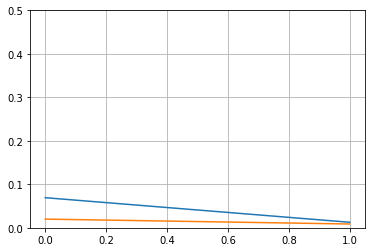

In [40]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 0.5)
plt.show()

In [41]:
y_pred

array([[-0.08593932],
       [-0.0250776 ],
       [-0.04504901],
       [ 0.1377931 ],
       [-0.10053048],
       [ 0.04224426],
       [ 0.0503008 ],
       [ 0.04028809],
       [-0.05950795],
       [-0.11845627],
       [ 0.09831809],
       [-0.05278406],
       [ 0.09612618],
       [-0.05626635],
       [ 0.0235841 ],
       [ 0.01167099],
       [-0.0406592 ],
       [-0.01848556],
       [ 0.02795196],
       [-0.05331439],
       [-0.37049422],
       [ 0.253532  ],
       [ 0.0691172 ],
       [-0.09931796],
       [-0.03719792],
       [ 0.3173203 ],
       [ 0.02708628],
       [-0.01668678],
       [-0.06866898],
       [ 0.2101635 ]], dtype=float32)

## Functional API

In [42]:
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [44]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 30)]         0           []                               
                                                                                                  
 dense_2 (Dense)                (None, 30)           930         ['input_1[0][0]']                
                                                                                                  
 dense_3 (Dense)                (None, 30)           930         ['dense_2[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 60)           0           ['input_1[0][0]',                
                                                                  'dense_3[0][0]']            

In [45]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0139


In [46]:
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
input_A = keras.layers.Input(shape=[15], name="wide_input")
input_B = keras.layers.Input(shape=[16], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [48]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :15], X_train[:, 14:]
X_valid_A, X_valid_B = X_valid[:, :15], X_valid[:, 14:]
X_test_A, X_test_B = X_test[:, :15], X_test[:, 14:]
X_new_A, X_new_B = X_test_A[:13], X_test_B[:13]

In [49]:
print(X_valid_A.shape)

(56962, 15)


In [50]:
print(X_valid_B.shape)

(56962, 16)


In [51]:
dataset.shape

(284807, 31)

In [52]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=2,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
history = model.fit((X_train_A, X_train_B), y_train, epochs=2)
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/2
5341/5341 [==============================] - 14s 3ms/step - loss: 0.0529 - val_loss: 0.0102
Epoch 2/2
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0077 - val_loss: 0.0064
Epoch 1/2
5341/5341 [==============================] - 8s 2ms/step - loss: 0.0053
Epoch 2/2
1781/1781 [==============================] - 3s 1ms/step - loss: 0.0039


Adding an auxiliary output for regularization:

In [53]:
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
input_A = keras.layers.Input(shape=[15], name="wide_input")
input_B = keras.layers.Input(shape=[16], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [55]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [56]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=2,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/2
5341/5341 [==============================] - 16s 3ms/step - loss: 0.0600 - main_output_loss: 0.0574 - aux_output_loss: 0.0838 - val_loss: 0.0148 - val_main_output_loss: 0.0108 - val_aux_output_loss: 0.0511
Epoch 2/2
5341/5341 [==============================] - 12s 2ms/step - loss: 0.0112 - main_output_loss: 0.0082 - aux_output_loss: 0.0379 - val_loss: 0.0092 - val_main_output_loss: 0.0069 - val_aux_output_loss: 0.0306


In [57]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1781/1781 [==============================] - 3s 2ms/step - loss: 0.0096 - main_output_loss: 0.0070 - aux_output_loss: 0.0329


## The subclassing API

In [58]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [59]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=2,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/2
5341/5341 [==============================] - 12s 2ms/step - loss: 0.0683 - output_1_loss: 0.0636 - output_2_loss: 0.1108 - val_loss: 0.0175 - val_output_1_loss: 0.0136 - val_output_2_loss: 0.0526
Epoch 2/2
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0108 - output_1_loss: 0.0083 - output_2_loss: 0.0333


## Saving and Restoring

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[30]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [62]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/2
5341/5341 [==============================] - 14s 2ms/step - loss: 0.0386 - val_loss: 0.0142
Epoch 2/2
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0091


In [63]:
model.save("my_keras_model.h5")

In [64]:
model = keras.models.load_model("my_keras_model.h5")

In [65]:
model.predict(X_new)

array([[-0.05965905],
       [ 0.09550394],
       [-0.16002388],
       [-0.17497751],
       [ 0.1589463 ],
       [ 0.04633654],
       [-0.07144958],
       [ 0.03849296],
       [-0.02324804],
       [-0.14886095],
       [ 0.02352482],
       [ 0.06281896],
       [ 0.07576385],
       [ 0.19906625],
       [-0.01114824],
       [-0.07218933],
       [ 0.08598034],
       [ 0.10371171],
       [-0.02683885],
       [ 0.10329883],
       [ 0.00627695],
       [ 0.0322999 ],
       [ 0.09913987],
       [-0.03016145],
       [ 0.19854511],
       [-0.02539453],
       [ 0.0092014 ],
       [ 0.09429449],
       [-0.04194904],
       [-0.01944483]], dtype=float32)

In [66]:
model.save_weights("my_keras_weights.ckpt")

In [67]:
model.load_weights("my_keras_weights.ckpt")

## Using Callbacks during Training

In [68]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [69]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[30]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [70]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/2
5341/5341 [==============================] - 11s 2ms/step - loss: 0.0386 - val_loss: 0.0142
Epoch 2/2
1781/1781 [==============================] - 2s 1ms/step - loss: 0.0091


In [71]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/2
5341/5341 [==============================] - 13s 2ms/step - loss: 0.0076 - val_loss: 0.0066
Epoch 2/2
1781/1781 [==============================] - 2s 1ms/step - loss: 0.0055


In [72]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [73]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

5317/5341 [============================>.] - ETA: 0s - loss: 0.0048
val/train: 0.93
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0048 - val_loss: 0.0045


## TensorBoard

In [74]:
import os
root_logdir = os.path.join(os.curdir, "my_logs")

In [75]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2022_07_02-04_51_19'

In [76]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [77]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[30]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [78]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/2
5341/5341 [==============================] - 11s 2ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 2/2
5341/5341 [==============================] - 12s 2ms/step - loss: 0.0011 - val_loss: 0.0011


In [79]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2022_07_02-04_51_42'

In [80]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [81]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[30]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [82]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=2,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/2
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0031 - val_loss: 0.0011
Epoch 2/2
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0011 - val_loss: 0.0011


In [83]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, write_steps_per_second=False, update_freq='epoch', profile_batch=0, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



# Hyperparameter Tuning

In [84]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [85]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[30]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [86]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [87]:
keras_reg.fit(X_train, y_train, epochs=2,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/2
5341/5341 [==============================] - 11s 2ms/step - loss: 0.0297 - val_loss: 0.0048
Epoch 2/2
5341/5341 [==============================] - 10s 2ms/step - loss: 0.0027 - val_loss: 0.0017


In [88]:
mse_test = keras_reg.score(X_test, y_test)

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0017


In [89]:
y_pred = keras_reg.predict(X_new)

In [90]:
np.random.seed(42)
tf.random.set_seed(42)

In [91]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)      .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=2,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/2
3561/3561 [==============================] - 8s 2ms/step - loss: 0.0060 - val_loss: 0.0017
Epoch 2/2
1781/1781 [==============================] - 3s 2ms/step - loss: 0.0019
[CV] END learning_rate=0.022174573948353458, n_hidden=1, n_neurons=4; total time=  19.1s
Epoch 1/2
3561/3561 [==============================] - 7s 2ms/step - loss: 0.0032 - val_loss: 0.0015
Epoch 2/2
1781/1781 [==============================] - 2s 1ms/step - loss: 0.0017
[CV] END learning_rate=0.022174573948353458, n_hidden=1, n_neurons=4; total time=  23.3s
Epoch 1/2
3561/3561 [==============================] - 7s 2ms/step - loss: 0.0108 - val_loss: 0.0014
Epoch 2/2
1781/1781 [==============================] - 2s 1ms/step - loss: 8.6701e-04
[CV] END learning_rate=0.022174573948353458, n_hidden=1, n_neurons=4; total time=  17.5s
Epoch 1/2
3561/3561 [==============================] - 8s 2ms/step - loss: 0.0132 - val_loss: 0.0056
Epoch 2/2
1781/178

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7fc68b56f810>,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.0006153331256530192,
                                                          0.0003920021771415983,
                                                          0.01619845322936229,
                                                          0.004779156784872302,
                                                          0.007821074275112298,...
                                                          0.00502142573

In [92]:
rnd_search_cv.best_params_

{'learning_rate': 0.01824796188192035, 'n_hidden': 0, 'n_neurons': 40}

In [93]:
rnd_search_cv.best_score_

-0.0010314764610181253

In [94]:
rnd_search_cv.best_estimator_

In [95]:
rnd_search_cv.score(X_test, y_test)

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0014


-0.0014375007012858987

In [96]:
model = rnd_search_cv.best_estimator_.model
model

In [97]:
model.evaluate(X_test, y_test)

1781/1781 [==============================] - 2s 1ms/step - loss: 0.0014


0.0014375007012858987